In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('../data/melb_data.csv') # https://www.kaggle.com/gunjanpathak/melb-data?select=melb_data.csv
df

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


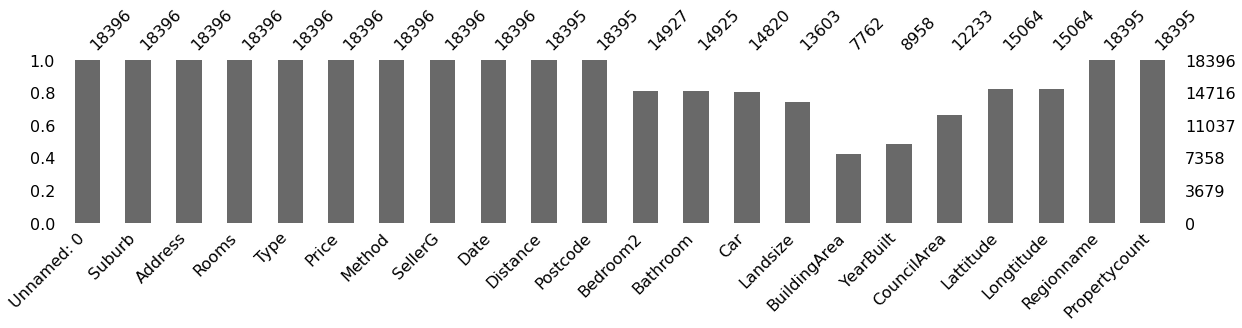

In [12]:
import missingno as msno # !pip install missingno
msno.bar(df, figsize=(20,3)) 

## small dataset

In [22]:
df = pd.read_csv('../data/melb_data.csv', usecols = ['Price','Landsize','Distance','Type', 'Regionname'])
df.shape
df[(df.Price < 3000000) & (df.Landsize < 1200)].shape
df = df[(df.Price < 3000000) & (df.Landsize < 1200)].sample(n=1000).reset_index(drop=True) # 1,000개 sampling
df

(18396, 5)

(12958, 5)

,Type,Price,Distance,Landsize,Regionname
0,h,1362000.0,6.4,497.0,Western Metropolitan
1,h,1205000.0,13.9,604.0,Southern Metropolitan
2,t,1236000.0,5.3,159.0,Southern Metropolitan
3,t,820000.0,16.2,260.0,Eastern Metropolitan
4,h,830000.0,13.3,608.0,Western Metropolitan
...,...,...,...,...,...
995,u,275000.0,4.6,479.0,Southern Metropolitan
996,h,820000.0,9.2,629.0,Northern Metropolitan
997,h,1875000.0,1.3,118.0,Northern Metropolitan
998,t,598000.0,7.8,108.0,Northern Metropolitan


In [25]:
df[['Type','Distance', 'Price']].groupby('Type').mean().round(2)

,Distance,Price
Type,,
h,10.81,1165650.98
t,9.59,861372.22
u,7.98,590546.05


## 1. Customize the column names

In [36]:
df[['Type','Distance']].groupby('Type').agg(('mean', 'count', 'size'))

Distance           
           mean count size
Type                      
h     10.805866   716  716
t      9.588889    90   90
u      7.980412   194  194

In [26]:
df[['Type','Distance']].groupby('Type').agg(avg_distance = ('Distance', 'mean'))

,avg_distance
Type,
h,10.805866
t,9.588889
u,7.980412


In [34]:
df[['Type','Distance']].groupby('Type').agg(avg_distance = ('Distance', 'mean'),  
                                            median_distance = ('Distance', 'median'))

,avg_distance,median_distance
Type,,
h,10.805866,10.4
t,9.588889,9.2
u,7.980412,7.5


## 2. Lambda expressions

In [39]:
df[['Type','Price']].groupby('Type').agg('mean').round(2)
df[['Type','Price']].groupby('Type').agg(avg_price_million = ('Price', lambda x: x.mean() / 1000)).round(2)

,Price
Type,
h,1165650.98
t,861372.22
u,590546.05


,avg_price_million
Type,
h,1165.65
t,861.37
u,590.55


## 3. As_index parameter

In [40]:
df[['Type','Regionname', 'Distance']].groupby(['Type','Regionname']).mean()

Distance
Type Regionname                           
h    Eastern Metropolitan        14.323077
     Eastern Victoria            36.900000
     Northern Metropolitan        9.122477
     Northern Victoria           28.650000
     South-Eastern Metropolitan  22.861538
     Southern Metropolitan        8.817949
     Western Metropolitan        11.017033
     Western Victoria            31.700000
t    Eastern Metropolitan        11.830769
     Northern Metropolitan        7.750000
     South-Eastern Metropolitan  20.000000
     Southern Metropolitan        9.834483
     Western Metropolitan         9.222222
u    Eastern Metropolitan        15.614286
     Northern Metropolitan        6.571930
     South-Eastern Metropolitan  19.725000
     Southern Metropolitan        7.396591
     Western Metropolitan         8.802632

In [41]:
df[['Type','Regionname', 'Distance']].groupby(['Type','Regionname'], as_index=False).mean()

,Type,Regionname,Distance
0,h,Eastern Metropolitan,14.323077
1,h,Eastern Victoria,36.900000
2,h,Northern Metropolitan,9.122477
3,h,Northern Victoria,28.650000
4,h,South-Eastern Metropolitan,22.861538
5,h,Southern Metropolitan,8.817949
6,h,Western Metropolitan,11.017033
7,h,Western Victoria,31.700000
8,t,Eastern Metropolitan,11.830769
9,t,Northern Metropolitan,7.750000


## 4. Missing values
The groupby function ignores the missing values by default.

In [45]:
df

,Type,Price,Distance,Landsize,Regionname
0,h,1362000.0,6.4,497.0,Western Metropolitan
1,h,1205000.0,13.9,604.0,Southern Metropolitan
2,t,1236000.0,5.3,159.0,Southern Metropolitan
3,t,820000.0,16.2,260.0,Eastern Metropolitan
4,h,830000.0,13.3,608.0,Western Metropolitan
...,...,...,...,...,...
995,u,275000.0,4.6,479.0,Southern Metropolitan
996,h,820000.0,9.2,629.0,Northern Metropolitan
997,h,1875000.0,1.3,118.0,Northern Metropolitan
998,t,598000.0,7.8,108.0,Northern Metropolitan


In [47]:
df.iloc[100:150, 0] = np.nan
df[100:150].head()

,Type,Price,Distance,Landsize,Regionname
100,NaN,605000.0,11.7,81.0,Southern Metropolitan
101,NaN,350000.0,5.2,0.0,Northern Metropolitan
102,NaN,1650000.0,8.2,698.0,Western Metropolitan
103,NaN,1320000.0,7.7,738.0,Western Metropolitan
104,NaN,580000.0,14.7,428.0,South-Eastern Metropolitan


In [48]:
df[['Type','Distance']].groupby('Type').mean()

,Distance
Type,
h,10.844853
t,9.548837
u,7.894022


In [49]:
df[['Type','Distance']].groupby('Type', dropna=False).mean()

,Distance
Type,
h,10.844853
t,9.548837
u,7.894022
NaN,10.000000


#  End